# 📘 Machine Learning 2025/2026  

# Laboratorio 6.2 — Logistic Regression  
### Docenti: Danilo Croce, Giorgio Gambosi  

---

## Modello Probabilistico, Log-Likelihood e Metodi di Ottimizzazione

Questa lezione costruisce logistic regression **come modello probabilistico**  
e spiega **come si addestra** usando gradient ascent, gradient descent e Newton–Raphson.

---

# 0️⃣ Likelihood, Log-Likelihood e Loss

---

## 🔍 Likelihood: quanto bene il modello spiega i dati

Il modello logistico assegna una probabilità

$$
p_i = p(C_1 \mid x_i) = \sigma(w^T x_i).
$$

Dato un esempio $(x_i, t_i)$ con $t_i \in \{0,1\}$, assumiamo:

$$
p(t_i \mid x_i,w) = p_i^{t_i}(1-p_i)^{1-t_i}.
$$

Per dati indipendenti:

$$
L(w) = \prod_{i=1}^n p(t_i \mid x_i,w).
$$

👉 **Addestrare logistic regression significa scegliere $w$ che massimizza $L(w)$.**

---

## 🧮 Log-Likelihood: perché la usiamo?

Il log della likelihood è:

$$
\ell(w)
= \sum_{i=1}^n \left[t_i\log p_i + (1-t_i)\log(1-p_i)\right].
$$

Perché si usa sempre $\ell(w)$?

- trasforma prodotti in somme  
- più stabile numericamente  
- facile da derivare  
- stesso punto massimo della likelihood  

---

## 🎯 Loss = −log-likelihood  
### (la Binary Cross Entropy non è altro che il negativo di $\ell(w)$)

Definiamo:

$$
\text{Loss}(w) = -\ell(w).
$$

Otteniamo la BCE:

$$
\text{BCE}(w)
= -\sum_{i=1}^n [t_i\log p_i + (1-t_i)\log(1-p_i)].
$$

👉 **Massimizzare $\ell(w)$ equivale a minimizzare la BCE.**  
È la stessa funzione, cambiata di segno.

---

# 1️⃣ Logistic Regression come modello probabilistico

Il modello è:

$$
p(C_1 \mid x) = \sigma(w^T x),
\qquad
\sigma(a)=\frac{1}{1+e^{-a}}.
$$

Con l’assunzione:

$$
t_i \mid x_i, w \sim \text{Bernoulli}(p_i).
$$

Quindi logistic regression:

- è un vero modello probabilistico  
- produce probabilità  
- deriva dalla massima verosimiglianza  
- è un caso dei **Generalized Linear Models (GLM)**  

---

# 2️⃣ Derivazione della log-likelihood

Da $p_i^{t_i}(1-p_i)^{1-t_i}$ otteniamo:

$$
\ell(w)=\sum_{i=1}^n[t_i\log p_i+(1-t_i)\log(1-p_i)].
$$

---

# 3️⃣ Derivazione del gradiente

Risultato centrale:

$$
\frac{\partial\ell}{\partial w}
= \sum_{i=1}^n (t_i - p_i)x_i.
$$

In forma compatta:

$$
\nabla\ell(w) = X^T(t - p).
$$

Questa formula è la base di **tutti** gli algoritmi del primo ordine.

---

# 🔥 METODI DI OTTIMIZZAZIONE

Tutti ottimizzano **la stessa log-likelihood**, ma usano informazioni diverse.

---

# 🅰️ Metodo A — Gradient Ascent (batch, deterministico)

Poiché vogliamo **massimizzare** $\ell(w)$:

$$
w_{k+1} = w_k + \alpha \nabla\ell(w_k)
= w_k + \alpha X^T(t - p).
$$

Caratteristiche:
- semplice  
- stabile  
- spesso lento  
- richiede scelta di $\alpha$

---

# 🅱️ Metodo B — Gradient Descent sulla Loss  
### (ma è lo stesso algoritmo)

Gradient Descent applicato alla loss:

$$
w_{k+1} = w_k - \alpha \nabla \text{Loss}(w_k).
$$

Poiché:

$$
\text{Loss}(w) = -\ell(w)
\quad\Rightarrow\quad
\nabla \text{Loss}(w) = -\nabla\ell(w),
$$

allora:

$$
w_{k+1}
= w_k - \alpha(-\nabla\ell(w_k))
= w_k + \alpha\nabla\ell(w_k).
$$

👉 **È IDENTICO al gradient ascent di prima.**

Stesso codice, solo scritto con un segno diverso.

---

# 🅾️ Metodo C — Newton–Raphson (IRLS, metodo dei GLM)

Gradient ascent usa solo la **pendenza** della log-likelihood.  
Newton–Raphson usa anche la **curvatura** tramite l’Hessiana:

$$
H(w)=\nabla^2 \ell(w).
$$

Nel caso della regressione logistica si può dimostrare che:

$$
H(w) = -X^T R X,
\qquad
R_{ii} = p_i(1-p_i).
$$

Questa struttura non è un caso ma è **tipica dei GLM**:  
tutta la seconda derivata ha sempre la forma:

> Matrice dei dati trasposta × matrice di pesi × matrice dei dati.

---

# 🔍 Perché l’Hessiana dei GLM ha sempre questa forma?

I GLM (Generalized Linear Models):
- assumono che la risposta $t_i$ appartenga a una **famiglia esponenziale**  
- usano un **link function** che collega  
  la media $\mathbb{E}[t_i] = \mu_i$ al predittore lineare $w^T x_i$  
- per la logistica il link è il **logit**, e la distribuzione è il Bernoulli

La famiglia esponenziale ha la forma:

$$
p(t_i \mid \theta_i)
= \exp\Big( t_i\theta_i - A(\theta_i) + B(t_i)\Big).
$$

Con:

- $\theta_i$ = parametro canonico  
- $A(\theta)$ = funzione log-partition  

Due proprietà chiave della famiglia esponenziale:

1.  
   $$
   \frac{\partial A}{\partial \theta}=\mu_i
   $$
   → la media è derivata della log-partition

2.  
   $$
   \frac{\partial^2 A}{\partial \theta^2}=\mathrm{Var}(t_i)
   $$
   → la varianza entra nell’Hessiana

---

# 🧩 Conseguenza: nei GLM, l’Hessiana è sempre  
### “Xᵀ · (varianza) · X”

Per logistic regression:

- distribuzione: Bernoulli  
- media: $p_i$  
- varianza: $p_i(1-p_i)$  

Ecco perché naturalmente:

$$
H(w)
= -X^T R X,
\qquad
R_{ii}=p_i(1-p_i).
$$

Questa forma:

- non dipende da trucchi  
- non è un artefatto del Bernoulli  
- vale per *tutti* i GLM (Poisson, Gamma, Softmax, ecc.)

È un risultato strutturale della famiglia esponenziale.

---

# 🧠 Newton–Raphson come IRLS (Iteratively Reweighted Least Squares)

Il passo generico di Newton è:

$$
w_{k+1} = w_k - H^{-1}(w_k)\,\nabla\ell(w_k).
$$

Sostituendo la forma dei GLM:

- $H = -X^T R X$
- $\nabla\ell = X^T (t - p)$

otteniamo:

$$
w_{k+1}
= w_k + (X^T R X)^{-1} X^T (t - p).
$$

Ma questa operazione **è identica** a risolvere un problema di minimi quadrati pesati:

$$
w_{k+1}
= \arg\min_w \left\| R^{1/2}(z - Xw)\right\|^2,
$$

dove

$$
z = \eta + R^{-1}(t - p),
\qquad
\eta = Xw.
$$

Per questo si chiama **Iteratively Reweighted Least Squares**:
- ogni iterazione è una regressione lineare pesata,
- i pesi sono $R = \mathrm{diag}(p_i(1-p_i))$,
- e vengono aggiornati in base alla curvatura locale.

---

# ⚡ Perché Newton–Raphson è molto più veloce?

Gradient ascent fa piccoli passi lungo il gradiente.

Newton invece:
1. costruisce una **approssimazione quadratica locale** della log-likelihood  
2. stima quanto “ripida” è la curva  
3. sceglie direttamente il punto di massimo di quel modello locale

Risultato:

- in genere converge in **2–6 iterazioni**
- non serve **learning rate**
- segue il paesaggio della funzione, non lo esplora alla cieca

---

# 📌 Riepilogo del ruolo di Newton nei GLM

- la log-likelihood dei GLM ha una struttura **quadratica locale perfetta**  
  → ottima per Newton  
- la Hessiana ha la forma **$X^T R X$**, sempre  
- ogni passo equivale a risolvere un problema di **least squares pesato**  
- Newton–Raphson è praticamente il metodo “naturale” per i GLM  
- per regressione logistica e softmax è la forma standard degli algoritmi statistici  
  (es. `glm` in R usa sempre IRLS)

In sintesi:

> **Nei GLM, Newton–Raphson non è un algoritmo in più:  
> è *l’algoritmo naturale* che sfrutta la struttura matematica del modello.**

---

# 📌 Riepilogo

| Metodo | Usa | Pro | Contro |
|-------|------|-----|--------|
| **Gradient Ascent / GD batch** | solo gradiente | semplice | lento |
| **Gradient Descent** | solo gradiente | formalmente diverso | stesso algoritmo |
| **Newton–Raphson / IRLS** | gradiente + Hessiana | molto veloce | inversione costosa |

Tutti risolvono:

$$
\max_w\;\ell(w)
= \sum_{i=1}^n[t_i\log p_i + (1-t_i)\log(1-p_i)].
$$

---

# 🎓 Messaggi chiave

### ✔ Logistic regression nasce dal Bernoulli  
### ✔ BCE = −log-likelihood  
### ✔ Gradient Ascent = Gradient Descent  
(stesso update, cambiano solo i segni)

### ✔ Newton–Raphson è molto più veloce  
Usa la curvatura e salta direttamente verso il massimo.

---

# 📚 Nota finale: SGD e Mini-batch

In questa lezione abbiamo usato la **versione batch**, cioè:

- ogni update usa **tutti gli esempi**,  
- utile per confrontare chiaramente ascent, descent e Newton.

Nella pratica, però, si usano varianti **stocastiche**:

### 🔸 *Stochastic Gradient Descent (SGD)*  
aggiorna i pesi usando **un solo esempio** alla volta:

$$
w \leftarrow w + \alpha (t_i - p_i)x_i.
$$

### 🔸 *Mini-batch SGD*  
aggiornamento su piccoli gruppi di esempi.

Queste varianti:

- sono molto più veloci nei dataset grandi  
- sono lo standard nel deep learning  
- convergono allo stesso ottimo della versione batch

Ma concettualmente non aggiungono nulla di nuovo:  
sono solo versioni “a pezzi” del batch gradient ascent.

---

w vero: [-0.5  1.   2. ]

w (GD su log-likelihood): [-0.59848483  1.17092941  2.18554726]
w (GD su loss -ℓ)       : [-0.59848483  1.17092941  2.18554726]
w (Newton)              : [-0.59621648  1.1656033   2.17603427]

Differenza tra w (GD loglik) e w (GD loss): 0.0


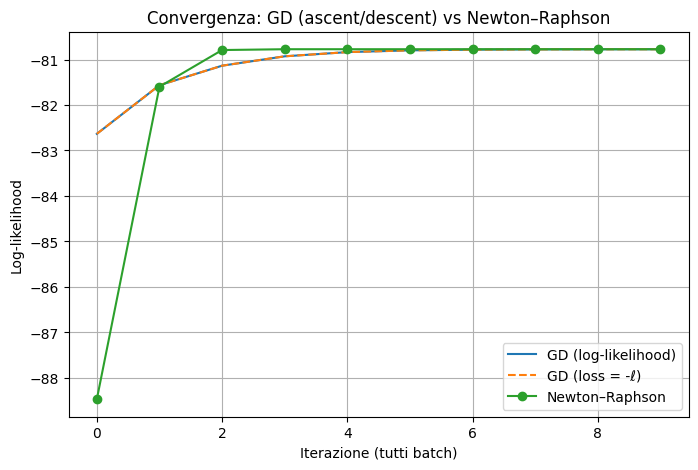

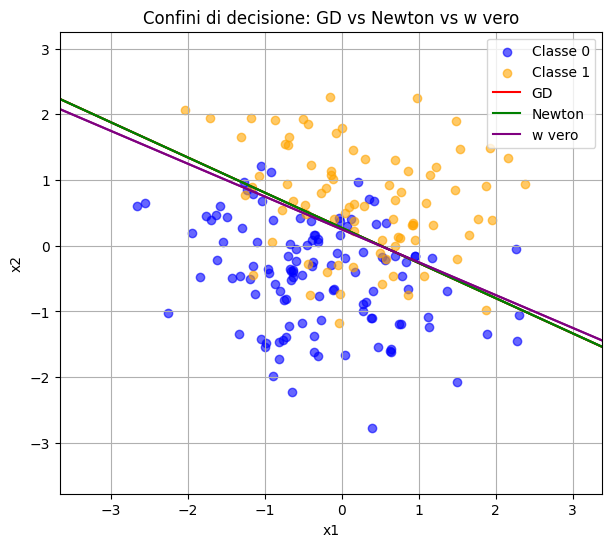

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Funzioni di base: sigmoid, log-likelihood, loss, gradienti, Hessiana
# ------------------------------------------------------------

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def log_likelihood(w, X, t):
    """
    ℓ(w) = sum_i [ t_i log p_i + (1 - t_i) log(1 - p_i) ]
    """
    p = sigmoid(X @ w)
    eps = 1e-12
    return np.sum(t * np.log(p + eps) + (1 - t) * np.log(1 - p + eps))

def loss(w, X, t):
    """
    Loss(w) = -ℓ(w)
    (eventualmente si può dividere per n, ma non cambia gli argomenti)
    """
    return -log_likelihood(w, X, t)

def grad_log_likelihood(w, X, t):
    """
    ∇ℓ(w) = X^T (t - p)
    """
    p = sigmoid(X @ w)
    return X.T @ (t - p)

def grad_loss(w, X, t):
    """
    ∇Loss(w) = -∇ℓ(w)
    """
    return -grad_log_likelihood(w, X, t)

def hessian_log_likelihood(w, X, t):
    """
    H_ℓ(w) = ∂²ℓ/∂w∂w^T = - X^T R X   con R = diag(p(1-p))
    """
    p = sigmoid(X @ w)
    R = p * (1 - p)          # (n,)
    XR = X * R[:, None]      # ogni riga di X moltiplicata per R_i
    return -(X.T @ XR)

def hessian_loss(w, X, t):
    """
    H_Loss(w) = -H_ℓ(w) = X^T R X
    """
    return -hessian_log_likelihood(w, X, t)


# ------------------------------------------------------------
# 1) Gradient ascent sulla log-likelihood
#    w_{k+1} = w_k + α ∇ℓ(w_k)
# ------------------------------------------------------------

def train_gd_loglik(X, t, alpha=0.1, n_iter=100):
    n, d = X.shape
    w = np.zeros(d)
    history_ll = []

    for k in range(n_iter):
        g = grad_log_likelihood(w, X, t)
        w = w + alpha * g      # ASCENT
        history_ll.append(log_likelihood(w, X, t))

    return w, history_ll


# ------------------------------------------------------------
# 2) Gradient descent sulla loss = -log-likelihood
#    w_{k+1} = w_k - α ∇Loss(w_k)
#    ma ∇Loss = -∇ℓ, quindi:
#    w_{k+1} = w_k + α ∇ℓ(w_k)  → identico al caso precedente
# ------------------------------------------------------------

def train_gd_loss(X, t, alpha=0.1, n_iter=100):
    n, d = X.shape
    w = np.zeros(d)
    history_ll = []

    for k in range(n_iter):
        gL = grad_loss(w, X, t)   # = -∇ℓ
        w = w - alpha * gL        # DESCENT sulla loss
        # ma w - α(-∇ℓ) = w + α ∇ℓ  → stesso update di sopra
        history_ll.append(log_likelihood(w, X, t))

    return w, history_ll


# ------------------------------------------------------------
# 3) Newton–Raphson sulla log-likelihood (forma GLM / IRLS)
#    Lavorare su ℓ o su Loss è equivalente: il passo viene lo stesso
# ------------------------------------------------------------

def train_newton(X, t, n_iter=8):
    """
    Newton su ℓ(w):
        H_ℓ(w) = -X^T R X
        ∇ℓ(w)  = X^T (t - p)

    Per risolvere ∇ℓ(w) = 0:
        w_{k+1} = w_k - H_ℓ(w_k)^{-1} ∇ℓ(w_k)

    Poiché H_ℓ è negativa definita, -H_ℓ = X^T R X è SPD:
        w_{k+1} = w_k + (X^T R X)^{-1} X^T (t - p)
    """
    n, d = X.shape
    w = np.zeros(d)
    history_ll = []

    for k in range(n_iter):
        p = sigmoid(X @ w)
        R = p * (1 - p)
        XR = X * R[:, None]
        H = X.T @ XR             # = -H_ℓ(w)  (positivo definito)
        grad_ll = X.T @ (t - p)  # ∇ℓ(w)

        try:
            delta_w = np.linalg.solve(H, grad_ll)
        except np.linalg.LinAlgError:
            delta_w = np.linalg.pinv(H) @ grad_ll

        w = w + delta_w          # passo di Newton
        history_ll.append(log_likelihood(w, X, t))

    return w, history_ll


# ------------------------------------------------------------
# Dataset sintetico 2D (con bias)
# ------------------------------------------------------------

np.random.seed(0)
n = 200
d = 2

X_raw = np.random.randn(n, d)
X = np.hstack([np.ones((n, 1)), X_raw])   # bias come prima colonna

w_true = np.array([-0.5, 1.0, 2.0])
p_true = sigmoid(X @ w_true)
t = np.random.binomial(1, p_true)

print("w vero:", w_true)

# ------------------------------------------------------------
# Addestramento con i tre metodi
# ------------------------------------------------------------

n_iter = 10

w_gd_ll,   hist_gd_ll   = train_gd_loglik(X, t, alpha=0.05, n_iter=n_iter)
w_gd_loss, hist_gd_loss = train_gd_loss  (X, t, alpha=0.05, n_iter=n_iter)
w_nr,      hist_nr      = train_newton   (X, t, n_iter=n_iter)

print("\nw (GD su log-likelihood):", w_gd_ll)
print("w (GD su loss -ℓ)       :", w_gd_loss)
print("w (Newton)              :", w_nr)

# Verifica numerica che GD su ℓ e GD su -ℓ coincidono
print("\nDifferenza tra w (GD loglik) e w (GD loss):",
      np.linalg.norm(w_gd_ll - w_gd_loss))


# ------------------------------------------------------------
# Plot 1: log-likelihood vs iterazioni (GD vs Newton)
# ------------------------------------------------------------

plt.figure(figsize=(8,5))

plt.plot(hist_gd_ll,   label="GD (log-likelihood)")
plt.plot(hist_gd_loss, '--', label="GD (loss = -ℓ)")

x_nr = np.linspace(0, len(hist_gd_ll)-1, len(hist_nr))
plt.plot(x_nr, hist_nr, 'o-', label="Newton–Raphson")

plt.xlabel("Iterazione (tutti batch)")
plt.ylabel("Log-likelihood")
plt.title("Convergenza: GD (ascent/descent) vs Newton–Raphson")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------
# Plot 2: Confini di decisione in 2D
# ------------------------------------------------------------

def plot_decision_boundaries(X, t, w_list, labels, title):
    x1_min, x1_max = X[:,1].min() - 1, X[:,1].max() + 1
    x2_min, x2_max = X[:,2].min() - 1, X[:,2].max() + 1

    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    Xg = np.c_[np.ones(xx1.size), xx1.ravel(), xx2.ravel()]

    plt.figure(figsize=(7,6))
    plt.scatter(X[t==0,1], X[t==0,2], c="blue",   label="Classe 0", alpha=0.6)
    plt.scatter(X[t==1,1], X[t==1,2], c="orange", label="Classe 1", alpha=0.6)

    colors = ["red", "green", "purple", "black"]

    for w, lab, col in zip(w_list, labels, colors):
        p = sigmoid(Xg @ w)
        Z = p.reshape(xx1.shape)
        cs = plt.contour(xx1, xx2, Z, levels=[0.5], colors=col)
        seg = cs.allsegs[0][0]
        plt.plot(seg[:,0], seg[:,1], col, label=lab)

    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_decision_boundaries(
    X, t,
    w_list=[w_gd_ll, w_nr, w_true],
    labels=["GD", "Newton", "w vero"],
    title="Confini di decisione: GD vs Newton vs w vero"
)